<h1> This is a deep learning example </h1>

In [7]:
import tensorflow as tf
tf.__version__
#importing the tensorflow and checking the version

'1.14.0'

<b> importing the dataset </b>

In [5]:
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand written digits

<b> splitting the dataset in train and test </b>

In [8]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


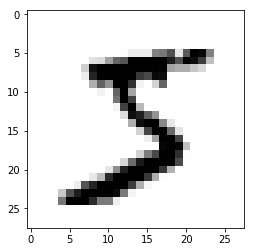

In [12]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0],cmap=plt.cm.binary) #this is show the image in binary
#plt.imshow(x_train[0])#This is show color image
plt.show()

In [14]:
#checking out the x_train value 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<b> normalize this data </b>

In [15]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [16]:
#checking again after normalization 
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<b> creating the model </b>

In [17]:
model = tf.keras.models.Sequential() #most common feed forward model 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<b> Training the model </b>

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3154 - acc: 0.9129
Epoch 2/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1402 - acc: 0.9586
Epoch 3/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0954 - acc: 0.9721


<b> calculating the loss </b>

In [21]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.1036 - acc: 0.9682
0.1035885455340147 0.9682


<b> saving a model for future use </b>

In [22]:
model.save('epic_num_reader_model')

<b> Loading a model from existing model </b>

In [23]:
new_model = tf.keras.models.load_model('epic_num_reader_model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<b> Predicting with the model </b>

In [30]:
import numpy as np
predictions = model.predict([x_test])

In [32]:
#print(predictions)
print(np.argmax(predictions[0]))

7


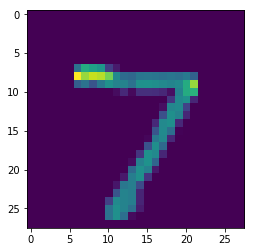

In [33]:
plt.imshow(x_test[0])
plt.show()